# R kernel

In [5]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(gridExtra)
library(rstatix)
library(reshape2)
library(ggnewscale)
library(RColorBrewer)
library(ComplexHeatmap)
library(SeuratDisk)
library(Seurat)
}) 

In [6]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.1,0,0.1,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.1,0,0.1, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=6,color="black"),
    legend.title=element_text(size=6,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=5),
    #panel.border = element_rect(size=0.25,color="black"),
    panel.grid = element_blank()
)
}

## Fig.S8B

In [7]:
metadata_merge = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/H5ad_file/All_samples_dist_cell2loc.csv",head=T)
metadata_merge$biopsy_type = factor(metadata_merge$biopsy_type, levels=c("NON LESIONAL", "LESIONAL"))

In [8]:
metadata_merge_Epi = subset(metadata_merge, Region == 'Epi')
metadata_merge_Der = subset(metadata_merge, Region == 'Der')

In [13]:
KC_plot = ggplot(metadata_merge_Epi, aes(y=Epi_Depth,x=Stress.KC, color=Stress.KC)) +
geom_point(stroke=NA, size=0.8) + 
facet_grid(.~biopsy_type, scales = "free_y") +
scale_color_continuous(type = "viridis") +
labs(y = 'Epi depth', x ='Stress KC cell2location score') +
scale_y_reverse() +
mytheme()

In [17]:
T_plot = ggplot(metadata_merge_Der, aes(y=Der_Depth,x=T.cells, color=T.cells)) +
geom_point(stroke=NA, size=0.8) + 
facet_grid(.~biopsy_type) +
scale_color_continuous(type = "viridis") +
labs(y = 'Der depth', x ='T cells cell2location score') +
scale_shape_manual(values = c("LESIONAL" = 17, "NON LESIONAL" = 16)) +
scale_y_reverse() +
mytheme()

In [18]:
B_plot = ggplot(metadata_merge_Der, aes(y=Der_Depth,x=B.cells, color=B.cells)) +
geom_point(stroke=NA, size=0.8) + 
facet_grid(.~biopsy_type) +
scale_color_continuous(type = "viridis") +
labs(y = 'Der depth', x ='B cells cell2location score') +
scale_y_reverse() +
mytheme()

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's shape values.”


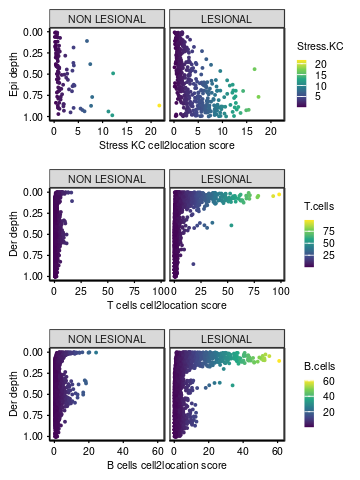

In [21]:
options(repr.plot.width =3,repr.plot.height =4)
plot_grid(KC_plot, T_plot, B_plot, ncol=1, align='v')

## Fig.S8C

In [23]:
metadata_merge_Der_melt = melt(metadata_merge_Der, measure.vars = c('T_IFN','T_STR','Tc','Tm','Tn','Tph_Tfh','Treg','Trm','γδT'))

In [24]:
metadata_merge_Der_melt_T = melt(metadata_merge_Der, measure.vars = c('T_IFN','T_STR','Tc','Tm','Tn','Tph_Tfh','Treg','Trm','γδT'))
metadata_merge_Der_melt_T$variable = factor(metadata_merge_Der_melt_T$variable, levels = c('Tn','Tm','Trm','Treg','Tph_Tfh','T_IFN','T_STR','Tc','γδT'))

In [25]:
metadata_merge_Der_melt_T$variable <- ifelse(
  (as.character(metadata_merge_Der_melt_T$variable) == 'T_IFN' |
   as.character(metadata_merge_Der_melt_T$variable) == 'Tm'),
  as.character(metadata_merge_Der_melt_T$variable),
  'Other T subtype'
)
metadata_merge_Der_melt_T$variable = factor(metadata_merge_Der_melt_T$variable, levels = c('Tm','T_IFN','Other T subtype'))

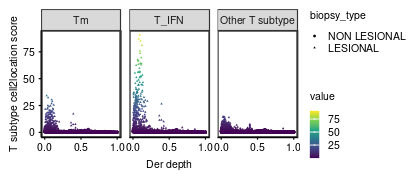

In [36]:
T_subtype_plot = ggplot(metadata_merge_Der_melt_T, aes(x=Der_Depth,y=value, color=value, shape=biopsy_type)) +
geom_point(stroke=NA, size=0.5) + 
facet_grid(.~variable) +
scale_color_continuous(type = "viridis") +
scale_shape_manual(values = c("LESIONAL" = 17, "NON LESIONAL" = 16)) +
labs(x = 'Der depth', y ='T subtype cell2location score') +
scale_x_continuous(n.breaks = 3) +
mytheme() +
theme(panel.spacing = unit(0.18, "cm"))

options(repr.plot.width =3.5,repr.plot.height =1.5)
T_subtype_plot

# pdf("figures/Pub_data_Tsubtype_depth_cell2loc_score_merge.pdf", w=3, h=1.3)
# T_subtype_plot
# dev.off()

In [27]:
metadata_merge_Der_melt_B = melt(metadata_merge_Der, measure.vars = c('B_ATM','B_GC','B_IFN','B_STR','Bn','Plasma'))
metadata_merge_Der_melt_B$variable = factor(metadata_merge_Der_melt_B$variable, levels = c('Bn','B_ATM','B_IFN','B_STR','B_GC','Plasma'))

In [28]:
metadata_merge_Der_melt_B$variable <- ifelse(
  (as.character(metadata_merge_Der_melt_B$variable) == 'B_IFN' |
   as.character(metadata_merge_Der_melt_B$variable) == 'B_GC' |
  as.character(metadata_merge_Der_melt_B$variable) == 'Bn' |
  as.character(metadata_merge_Der_melt_B$variable) == 'Plasma'),
  as.character(metadata_merge_Der_melt_B$variable),
  'Other B subtype'
)
metadata_merge_Der_melt_B$variable = factor(metadata_merge_Der_melt_B$variable, levels = c('Bn','B_IFN','B_GC','Plasma','Other B subtype'))

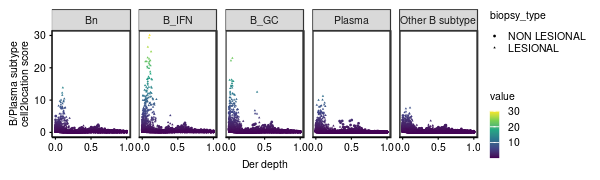

In [37]:
B_subtype_plot = ggplot(metadata_merge_Der_melt_B, aes(x=Der_Depth,y=value, color=value, shape=biopsy_type)) +
geom_point( stroke=NA, size=0.5) + 
facet_grid(.~variable) +
scale_color_continuous(type = "viridis") +
scale_shape_manual(values = c("LESIONAL" = 17, "NON LESIONAL" = 16)) +
labs(x = 'Der depth', y ='B/Plasma subtype\ncell2location score') +
scale_x_continuous(n.breaks = 3) +
mytheme() +
theme(panel.spacing = unit(0.18, "cm"))

options(repr.plot.width =5,repr.plot.height =1.5)
B_subtype_plot

# pdf("figures/Pub_data_Bsubtype_depth_cell2loc_score_merge.pdf", w=4.3, h=1.3)
# B_subtype_plot
# dev.off()

## Fig.S8D

In [38]:
gene_expr = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/Gene_expr.csv",head=T)
gene_expr$biopsy_type = factor(gene_expr$biopsy_type, levels=c("NON LESIONAL", "LESIONAL"))

In [39]:
gene_expr_Epi = subset(gene_expr, Region == 'Epi')
gene_expr_Der = subset(gene_expr, Region == 'Der')

In [47]:
cxcl9_plot = ggplot(gene_expr_Epi, aes(y=Epi_Depth,x=CXCL9, color=CXCL9)) +
geom_point(stroke=NA, size=0.5) + 
facet_grid(.~biopsy_type) +
scale_color_continuous(type = "viridis") +
labs(y = 'Epi depth', x ='Gene expression') +
scale_y_reverse() +
mytheme()

In [46]:
cxcl10_plot = ggplot(gene_expr_Epi, aes(y=Epi_Depth,x=CXCL10, color=CXCL10)) +
geom_point(stroke=NA, size=0.5) + 
facet_grid(.~biopsy_type) +
scale_color_continuous(type = "viridis") +
labs(y = 'Epi depth', x ='Gene expression') +
scale_y_reverse() +
mytheme()

In [45]:
cxcr3_plot = ggplot(gene_expr_Der, aes(y=Der_Depth,x=CXCR3, color=CXCR3)) +
geom_point(stroke=NA, size=0.5) + 
facet_grid(.~biopsy_type) +
scale_color_continuous(type = "viridis") +
labs(y = 'Der depth', x ='Gene expression') +
scale_y_reverse() +
mytheme()

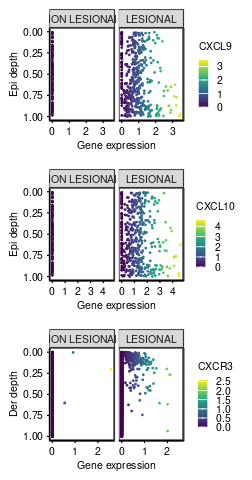

In [48]:
options(repr.plot.width =2.1,repr.plot.height =4)
plot_grid(cxcl9_plot, cxcl10_plot, cxcr3_plot, ncol=1, align='v')

# pdf("figures/Pub_data_cxcl9_cxcl10_cxcr3_depth_expr.pdf",w=2.1,h=3.5)
# plot_grid(cxcl9_plot, cxcl10_plot, cxcr3_plot, ncol=1, align='v')
# dev.off()

# Python kernel

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
from shapely.geometry import GeometryCollection, Polygon
import matplotlib.backends.backend_pdf as pdf_backend
import warnings
warnings.filterwarnings('ignore')
import importlib

import utils_20250718
importlib.reload(utils_20250718)
from utils_20250718 import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Fig.S8A

In [6]:
genes = ["IFI6","IFI16","IFI27","IFI27L1","IFI27L2","IFI30","IFI35","IFI44","IFI44L","IFIH1","IFIT1","IFIT2","IFIT3","IFIT5","IFITM1","IFITM3","ISG15","ISG20",
             "IRF1","IRF2","IRF3","IRF7","IRF9",
             "OAS1","OAS2","OAS3",'OASL','GBP1','GBP2','GBP3','GBP4',"STAT1","STAT2","DDX58", "DDX60","MX1",'TRIM22','BST2',"TYK2", #'PARP8','PARP9','PARP10','PARP12','PARP14','APOL6',
            "IL18","IL20","IL34","IL36G",
            "CCL20","CCL27","CXCL2","CXCL3","CXCL9","CXCL10","CXCL11"]

In [3]:
Pub_adata_merge = sc.read("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/H5ad_file/All_samples_dist_cell2loc.h5ad")
Pub_adata_merge.obs['biopsy_type'] = pd.Categorical(Pub_adata_merge.obs['biopsy_type'], categories=['NON LESIONAL', 'LESIONAL'])

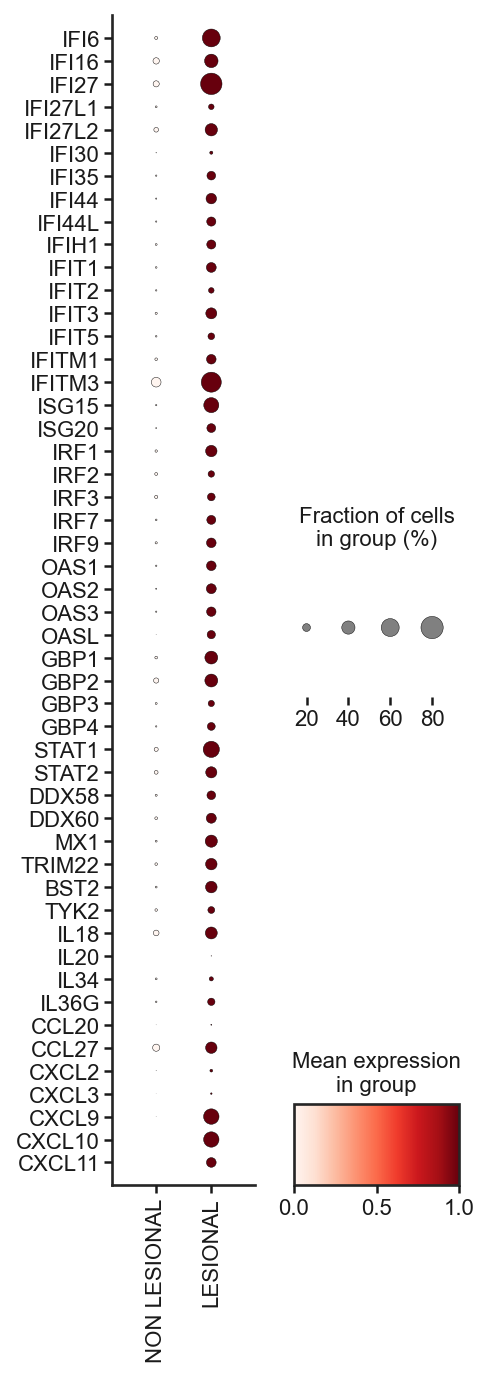

In [7]:
axes_dict = sc.pl.dotplot(Pub_adata_merge, genes, groupby='biopsy_type', figsize=(2.8,9.5), standard_scale='var',show=False, return_fig=True, swap_axes=True)
axes_dict.style(largest_dot=100, cmap='Reds') #coolwarm
axes_dict.show()

## Fig.S8B

In [51]:
from shapely.affinity import scale
def flip_y(geometry):
    return scale(geometry, xfact=1, yfact=-1, origin=(0, 0))

def flip_x(geometry):
    return scale(geometry, xfact=-1, yfact=1, origin=(0, 0))

In [63]:
sample_adata = sc.read(f'/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/H5ad_file/P3_LESIONAL_dist_cell2loc.h5ad')  
BM_shp = gpd.read_file(f'/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/Tissue_line/SHP_file/P3_LESIONAL_BM_tussue_contour.shp')
Epi_line_shp = gpd.read_file(f'/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/Tissue_line/SHP_file/P3_LESIONAL_Epi_line_tussue_contour.shp')
Der_line_shp = gpd.read_file(f'/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/Tissue_line/SHP_file/P3_LESIONAL_Der_line_tussue_contour.shp')

[15:51:11] ❕  ssat is not registered, register now                                           ]8;id=923061;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=149012;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:51:12] ❕  ssat is not registered, register now                                           ]8;id=552882;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=378303;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

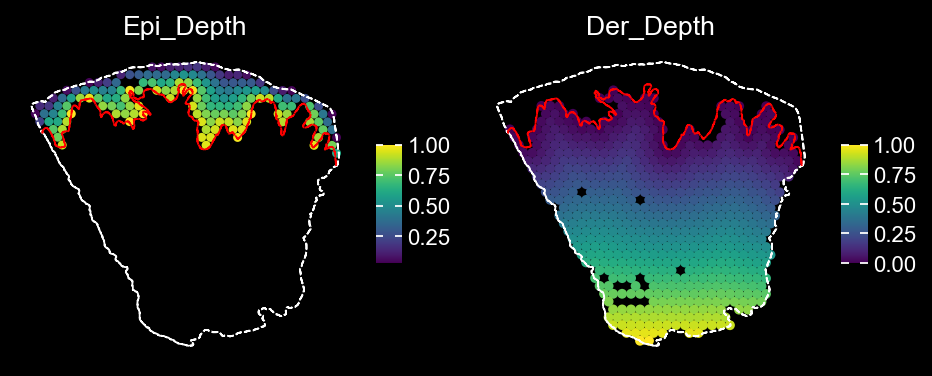

In [64]:
flip(sample_adata, axis='x', reduction='spatial', inplace=True)
BM_shp['geometry'] = BM_shp['geometry'].apply(flip_x)
Epi_line_shp['geometry'] = Epi_line_shp['geometry'].apply(flip_x)
Der_line_shp['geometry'] = Der_line_shp['geometry'].apply(flip_x)

regions = ['Epi','Der']
with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(6, 3))    
    for i, region in enumerate(regions):   
        ax = axs[i]
        feature = f"{region}_Depth"
        ax = featureplot(sample_adata[sample_adata.obs.Region == region], feature,reduction='spatial', dot_size=3000, cmap='viridis',style='dark_background', vmax=1, ax=ax)
        Epi_line_shp.plot(ax=ax,  edgecolor='white',facecolor='none', linestyle='--', linewidth=0.8)
        Der_line_shp.plot(ax=ax,  edgecolor='white',facecolor='none', linestyle='--', linewidth=0.8)
        BM_shp.plot(ax=ax,  edgecolor='red',facecolor='none', linestyle='--', linewidth=0.8)
        ax.set_title(f"{region}_Depth", fontsize=12)  

[15:49:45] ❕  ssat is not registered, register now                                           ]8;id=290362;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=368656;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:49:46] ❕  ssat is not registered, register now                                           ]8;id=526318;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=6304;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=595809;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=997566;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:49:47] ❕  ssat is not registered, register now                                           ]8;id=657650;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=838919;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:49:48] ❕  ssat is not registered, register now                                           ]8;id=251953;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=354378;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=87744;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=620138;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

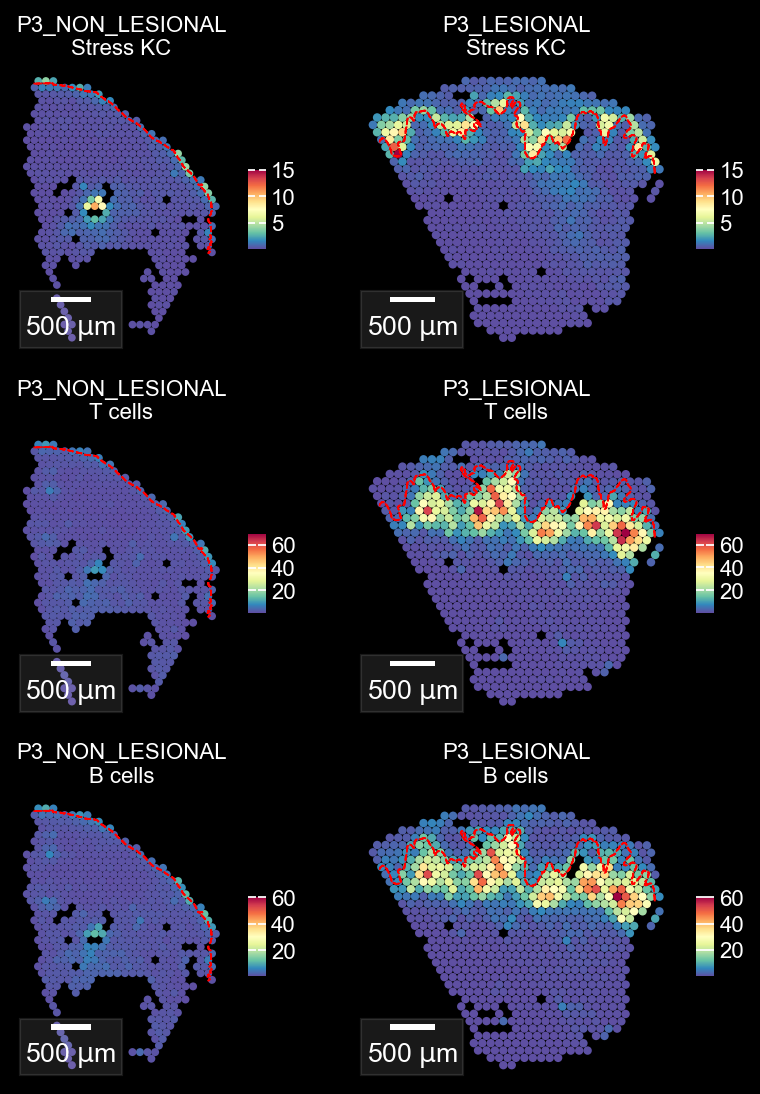

In [59]:
samples = ['P3_NON_LESIONAL','P3_LESIONAL']
celltypes = ['Stress KC','T cells', 'B cells'] # 

with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(6, 7), squeeze=False ) 
    for i, celltype in enumerate(celltypes): 
        for j, sample in enumerate(samples): 
            ax = axs[i, j]
            
            BM_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/Tissue_line/SHP_file/{sample}_BM_tussue_contour.shp")
            sample_adata = sc.read(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/H5ad_file/{sample}.h5ad")
            sample_adata.obs[['x','y']] = sample_adata.obsm['spatial']
            
            if celltype == 'Stress KC':
                cell2loc_metadata = pd.read_csv(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/cell2location/subtype/{sample}.all.denovo.q05_cell_abundance_w_sf.csv", index_col=0)
                vmax = 15
            else :
                cell2loc_metadata = pd.read_csv(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/cell2location/celltype/{sample}.all.denovo.q05_cell_abundance_w_sf.csv", index_col=0)
                if celltype == 'T cells':
                    vmax = 70
                else:
                    vmax = 60
            cell2loc_metadata.columns = cell2loc_metadata.columns.str.replace("q05cell_abundance_w_sf_","")
            sample_adata.obs = sample_adata.obs.join(cell2loc_metadata, how="left")
        
            if sample == 'P3_NON_LESIONAL':
                sample_adata = sample_adata[sample_adata.obs['y'] < 12000]
                flip(sample_adata, axis='y', reduction='spatial', inplace=True)
                BM_shp['geometry'] = BM_shp['geometry'].apply(flip_y)
            else:
                flip(sample_adata, axis='x', reduction='spatial', inplace=True)
                BM_shp['geometry'] = BM_shp['geometry'].apply(flip_x)
        
            ax = featureplot(sample_adata, features=celltype, reduction='spatial', dot_size=3000,vmax=vmax, style='dark_background', ax=ax) 
            BM_shp.plot(ax=ax, edgecolor='red',facecolor='none', linestyle='--', linewidth=0.8)
            ax.set_title(f'{sample}\n{celltype}', fontsize=10)
            draw_scalebar(ax=ax, location='lower left',color='white')

## Fig.S8D

[15:56:14] ❕  ssat is not registered, register now                                           ]8;id=86864;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=255185;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:56:15] ❕  ssat is not registered, register now                                           ]8;id=805859;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=586188;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:56:16] ❕  ssat is not registered, register now                                           ]8;id=497350;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=864337;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=2936;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=111882;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:56:17] ❕  ssat is not registered, register now                                           ]8;id=304261;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=284263;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:56:18] ❕  ssat is not registered, register now                                           ]8;id=564053;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=612498;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

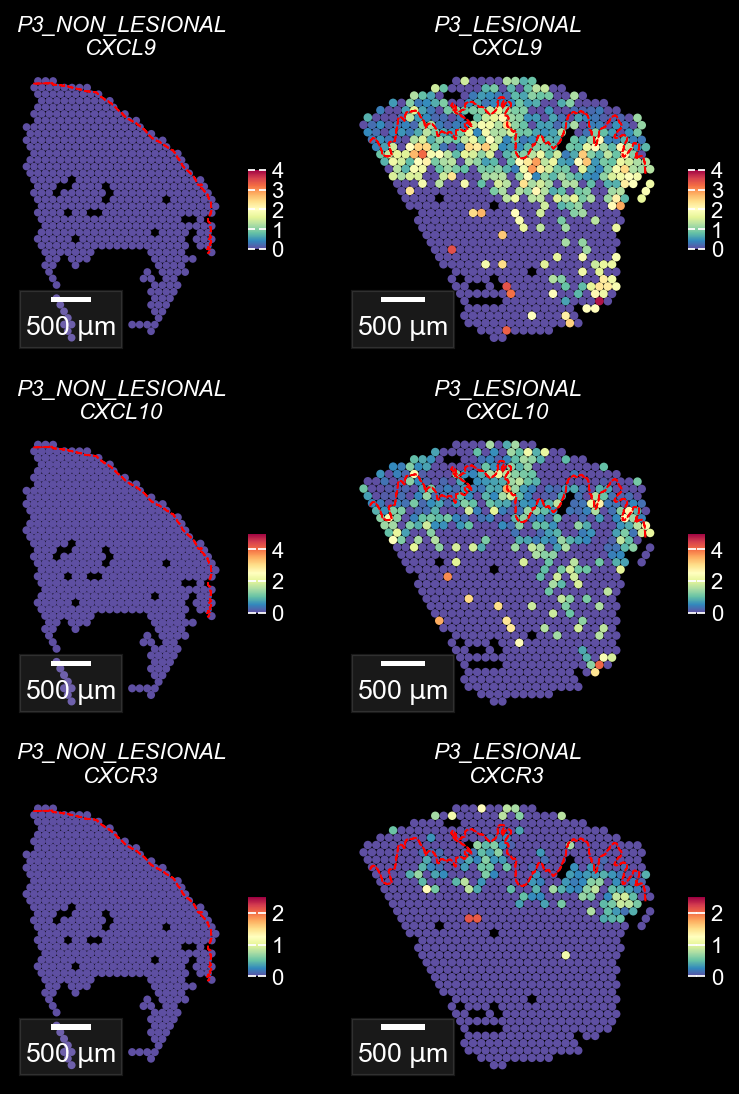

In [66]:
samples = ['P3_NON_LESIONAL','P3_LESIONAL']
genes = ['CXCL9','CXCL10', 'CXCR3']

with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(6, 7), squeeze=False ) 
    for i, gene in enumerate(genes): 
        for j, sample in enumerate(samples): 
            ax = axs[i, j]
            
            BM_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/Tissue_line/SHP_file/{sample}_BM_tussue_contour.shp")
            sample_adata = sc.read(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/H5ad_file/{sample}.h5ad")
            sample_adata.obs[['x','y']] = sample_adata.obsm['spatial']
            
            if gene == 'CXCL9':
                vmax = 4
            elif gene == 'CXCL10':
                vmax = 5
            else:
                vmax = 2.5
        
            if sample == 'P3_NON_LESIONAL':
                sample_adata = sample_adata[sample_adata.obs['y'] < 12000]
                flip(sample_adata, axis='y', reduction='spatial', inplace=True)
                BM_shp['geometry'] = BM_shp['geometry'].apply(flip_y)
            else:
                flip(sample_adata, axis='x', reduction='spatial', inplace=True)
                BM_shp['geometry'] = BM_shp['geometry'].apply(flip_x)
        
            ax = featureplot(sample_adata, features=gene, reduction='spatial', dot_size=3000,vmax=vmax, style='dark_background', ax=ax) 
            BM_shp.plot(ax=ax, edgecolor='red',facecolor='none', linestyle='--', linewidth=0.8)
            ax.set_title(f'{sample}\n{gene}', fontsize=10)
            draw_scalebar(ax=ax, location='lower left',color='white')

## Fig.S8E

In [67]:
import networkx as nx
import libpysal
import esda
import squidpy as sq
from esda.moran import Moran_Local_BV, Moran_BV

def moran_hot_cold_spots(moran_loc, p=0.05):
    sig = 1 * (moran_loc.p_sim < p)
    HH = 1 * (sig * moran_loc.q == 1)
    LL = 3 * (sig * moran_loc.q == 3)
    LH = 2 * (sig * moran_loc.q == 2)
    HL = 4 * (sig * moran_loc.q == 4)
    cluster = HH + LL + LH + HL
    return cluster


def mask_local_auto(moran_loc, p=0.5):
    """
    Create Mask for coloration and labeling of local spatial autocorrelation

    Parameters
    ----------
    moran_loc : esda.moran.Moran_Local instance
        values of Moran's I Global Autocorrelation Statistic
    p : float
        The p-value threshold for significance. Points will
        be colored by significance.

    Returns
    -------
    cluster_labels : list of str
        List of labels - ['ns', 'HH', 'LH', 'LL', 'HL']
    colors5 : list of str
        List of colours - ['#d7191c', '#fdae61', '#abd9e9',
        '#2c7bb6', 'lightgrey']
    colors : array of str
        Array containing coloration for each input value/ shape.
    labels : list of str
        List of label for each attribute value/ polygon.
    """
    
    cluster = moran_hot_cold_spots(moran_loc, p)

    cluster_labels = ["N.S.", "HH", "LH", "LL", "HL"]
    labels = [cluster_labels[i] for i in cluster]

    colors5 = {0: "lightgrey", 1: "#d7191c", 2: "#abd9e9", 3: "#2c7bb6", 4: "#fdae61"}
    colors = [colors5[i] for i in cluster] 

    x = np.array(labels)
    y = np.unique(x)
    colors5_mpl = {
        "HH": "#d7191c",
        "LH": "#abd9e9",
        "LL": "#2c7bb6",
        "HL": "#fdae61",
        "N.S.": "lightgrey",
    }
    colors5 = [colors5_mpl[i] for i in y]


    cluster_labels.sort()
    return cluster_labels, colors5, colors, labels

In [68]:
moran_color_1={
    "HH": "#d7191c",
    "LH": "#abd9e9",
    "LL": "lightgrey",
    "HL": "#fdae61",
    "N.S.": "lightgrey",   
}

In [70]:
sample_info = pd.read_csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/Sample_info.csv", comment="#")

[16:12:25] ❕  ssat is not registered, register now                                           ]8;id=904970;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=181813;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `object_slide` to adata.uns                                   ]8;id=765505;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=841690;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `labels` to adata.uns                                         ]8;id=904367;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=755549;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

[16:12:26] ❕  ssat is not registered, register now                                           ]8;id=354548;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=817937;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `object_slide` to adata.uns                                   ]8;id=483627;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=813563;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `labels` to adata.uns                                         ]8;id=709831;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=43649;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=134066;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=743972;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `object_slide` to adata.uns                                   ]8;id=331635;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=64641;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `labels` to adata.uns                                         ]8;id=485464;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=755446;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

[16:12:27] ❕  ssat is not registered, register now                                           ]8;id=765052;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=765670;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `object_slide` to adata.uns                                   ]8;id=377875;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=537144;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `labels` to adata.uns                                         ]8;id=464878;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=25569;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

[16:12:28] ❕  ssat is not registered, register now                                           ]8;id=832786;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=472990;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `object_slide` to adata.uns                                   ]8;id=211319;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=821214;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `labels` to adata.uns                                         ]8;id=145515;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=678850;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=112879;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=465640;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `object_slide` to adata.uns                                   ]8;id=518110;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=399294;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `labels` to adata.uns                                         ]8;id=137199;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=76170;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

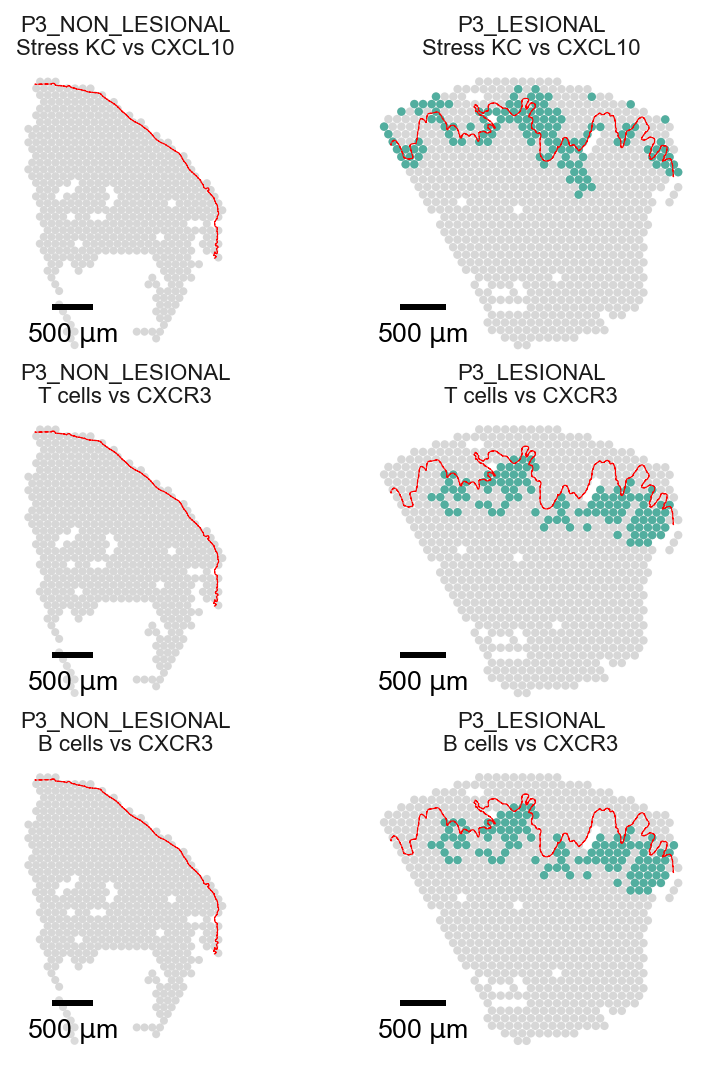

In [90]:
sample_info_P3 = sample_info[sample_info['Patient'] == 'LP3']

cells = ["Stress KC", "T cells","B cells"]
genes = ["CXCL10", "CXCR3", "CXCR3"]


fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(6, 8), squeeze=False ) 
for i, cell in enumerate(cells): 
    for j, row in enumerate(sample_info_P3.itertuples(index=False)):
        ax = axs[i, j]
        
        sample = row.Sample
        slide = row.Slide
        BM_shp = gpd.read_file(f'/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE206391/Tissue_line/SHP_file/{sample}_BM_tussue_contour.shp')
        sample_adata = Pub_adata_merge[Pub_adata_merge.obs['capture_area'] == slide]
        if sample == 'P3_NON_LESIONAL':
            sample_adata = sample_adata[sample_adata.obs['y'] < 12000]
        sample_adata.obs[genes[i]] = sample_adata[:, genes[i]].X.toarray().flatten()
        
        sq.gr.spatial_neighbors(sample_adata)
        g = nx.Graph(sample_adata.obsp['spatial_connectivities'])
        W = libpysal.weights.W.from_networkx(g)
        W.set_transform("r")
        moran_loc_bv = Moran_Local_BV(sample_adata.obs[genes[i]], sample_adata.obs[cell], W)
        sample_adata.obs['labels'] = mask_local_auto(moran_loc_bv)[3]

        if sample == 'P3_NON_LESIONAL':
            sample_adata = sample_adata[sample_adata.obs['y'] < 12000]
            flip(sample_adata, axis='y', reduction='spatial', inplace=True)
            BM_shp['geometry'] = BM_shp['geometry'].apply(flip_y)
        else:
            flip(sample_adata, axis='x', reduction='spatial', inplace=True)
            BM_shp['geometry'] = BM_shp['geometry'].apply(flip_x)
            
        ax = dimplot(sample_adata, 'object_slide', reduction='spatial', palette=['lightgray'], dot_size=400, legend=False, ax=ax)
        dimplot(sample_adata, 'labels', reduction='spatial', order=['HH'], palette=['#44aa99'], dot_size=400, legend=False,ax=ax)
        ax.set_title(f"{sample}\n{cell} vs {genes[i]}", fontsize=10)
        draw_scalebar(ax=ax, location='lower left',color='black')
        BM_shp.plot(ax=ax, edgecolor='red',facecolor='none', linewidth=0.5,linestyle='--')